In [92]:
import pandas as pd

In [93]:
import seaborn as sns

In [94]:
import matplotlib.pyplot as plt
from math import exp, expm1,log
import numpy as np

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [96]:
demog = pd.read_csv('Pat_demo_analysis.csv', delimiter = '|')

In [97]:
#demog.info()

In [98]:
cols = demog.columns.tolist()
cols = cols[-7: ] + cols[ : -7]
cols

['PTNT_MSTR_ID',
 'age',
 'GENDER',
 'COMNTY_NM',
 'FIN_CLASS',
 'HF_YN',
 'category.1',
 'category']

In [99]:
#cols = cols[-6: ] + cols [ : -1]

In [100]:
#cols

In [101]:
demog = demog[cols]

In [102]:
demog.FIN_CLASS.unique()

array(['Self-pay', 'Medicare', 'Medicaid', 'Non-Government Insurance',
       'Government Insurance', 'Commercial', "Worker's Comp", 'Other',
       'Unknown', nan], dtype=object)

In [103]:
demog= demog.dropna()

In [104]:
demog.shape

(701551, 8)

In [105]:
demog.shape

(701551, 8)

In [106]:
#demog.head()

In [107]:
#demog[(demog['category.1']== 'Diabetes')].head()

In [108]:
demog.HF_YN.count()

701551

In [109]:
#pd.get_dummies(demog, prefix= )

In [110]:
demog.HF_YN.value_counts()

Y    700726
N       825
Name: HF_YN, dtype: int64

In [111]:
cleanup_nums = {"GENDER":     {"Male": 1, "Female": 0},
                "HF_YN": {"Y": 1, "N": 0 }}

In [112]:
demog.replace(cleanup_nums, inplace=True)
demog.head()

,PTNT_MSTR_ID,age,GENDER,COMNTY_NM,FIN_CLASS,HF_YN,category.1,category
0,613298623.0,84.0,1,St Louis,Self-pay,1,Coronary Artery Disease,1st degree AV block
1,613298623.0,84.0,1,St Louis,Self-pay,1,Hypertension,1st degree AV block
2,613337430.0,70.0,1,St Louis,Self-pay,1,Cardiomyopathy,1st degree AV block
3,613337430.0,70.0,1,St Louis,Self-pay,1,Diabetes,1st degree AV block
4,613519235.0,72.0,1,Springfield,Self-pay,1,Chronic Obstructive Pulmonary Disease (COPD),1st degree AV block


In [113]:
pd.get_dummies(demog, columns=["FIN_CLASS", "category.1","category"], prefix=["pay", "disease","arrhy"]).head()

,PTNT_MSTR_ID,age,GENDER,COMNTY_NM,HF_YN,pay_Commercial,pay_Government Insurance,pay_Medicaid,pay_Medicare,pay_Non-Government Insurance,...,arrhy_Sinus tachycardia,arrhy_Supraventricular tachycardia,arrhy_Torsades de pointes,arrhy_Unspecified bundle branch block,arrhy_Ventricular fibrillation,arrhy_Ventricular flutter,"arrhy_Ventricular tachycardia, non-sustained","arrhy_Ventricular tachycardia, sustained monomorphic","arrhy_Ventricular tachycardia, sustained polymorphic","arrhy_Ventricular tachycardia, sustained, unknown morphology"
0,613298623.0,84.0,1,St Louis,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,613298623.0,84.0,1,St Louis,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,613337430.0,70.0,1,St Louis,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,613337430.0,70.0,1,St Louis,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,613519235.0,72.0,1,Springfield,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
demog['age_lognorm'] = np.log(demog['age'])

C:\Users\thiruv4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [115]:
demog.head()

,PTNT_MSTR_ID,age,GENDER,COMNTY_NM,FIN_CLASS,HF_YN,category.1,category,age_lognorm
0,613298623.0,84.0,1,St Louis,Self-pay,1,Coronary Artery Disease,1st degree AV block,4.430817
1,613298623.0,84.0,1,St Louis,Self-pay,1,Hypertension,1st degree AV block,4.430817
2,613337430.0,70.0,1,St Louis,Self-pay,1,Cardiomyopathy,1st degree AV block,4.248495
3,613337430.0,70.0,1,St Louis,Self-pay,1,Diabetes,1st degree AV block,4.248495
4,613519235.0,72.0,1,Springfield,Self-pay,1,Chronic Obstructive Pulmonary Disease (COPD),1st degree AV block,4.276666


In [116]:
# demog = demog.drop(['PTNT_MSTR_ID','age'], axis=1)

In [117]:
demog.head()

,PTNT_MSTR_ID,age,GENDER,COMNTY_NM,FIN_CLASS,HF_YN,category.1,category,age_lognorm
0,613298623.0,84.0,1,St Louis,Self-pay,1,Coronary Artery Disease,1st degree AV block,4.430817
1,613298623.0,84.0,1,St Louis,Self-pay,1,Hypertension,1st degree AV block,4.430817
2,613337430.0,70.0,1,St Louis,Self-pay,1,Cardiomyopathy,1st degree AV block,4.248495
3,613337430.0,70.0,1,St Louis,Self-pay,1,Diabetes,1st degree AV block,4.248495
4,613519235.0,72.0,1,Springfield,Self-pay,1,Chronic Obstructive Pulmonary Disease (COPD),1st degree AV block,4.276666


In [118]:
demog = pd.get_dummies(demog, columns=["FIN_CLASS", "category.1","category"], prefix=["pay", "disease","arrhy"])

In [119]:
demog.head()

,PTNT_MSTR_ID,age,GENDER,COMNTY_NM,HF_YN,age_lognorm,pay_Commercial,pay_Government Insurance,pay_Medicaid,pay_Medicare,...,arrhy_Sinus tachycardia,arrhy_Supraventricular tachycardia,arrhy_Torsades de pointes,arrhy_Unspecified bundle branch block,arrhy_Ventricular fibrillation,arrhy_Ventricular flutter,"arrhy_Ventricular tachycardia, non-sustained","arrhy_Ventricular tachycardia, sustained monomorphic","arrhy_Ventricular tachycardia, sustained polymorphic","arrhy_Ventricular tachycardia, sustained, unknown morphology"
0,613298623.0,84.0,1,St Louis,1,4.430817,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,613298623.0,84.0,1,St Louis,1,4.430817,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,613337430.0,70.0,1,St Louis,1,4.248495,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,613337430.0,70.0,1,St Louis,1,4.248495,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,613519235.0,72.0,1,Springfield,1,4.276666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# demog = demog.drop(['COMNTY_NM'], axis = 1)

In [121]:
#sns.lmplot(x="age_lognorm", y="HF_YN", data=demog);

In [122]:
#demog.shape

In [123]:
#demog.corr()[:]

In [124]:
demog = demog.replace([np.inf, -np.inf], np.nan).dropna(subset=["age_lognorm"], how="all")

In [125]:
demog.shape

(701549, 75)

In [126]:
X = demog.drop(['HF_YN','COMNTY_NM','PTNT_MSTR_ID','age'],axis = 1)

In [127]:
y = demog.HF_YN

In [128]:
#demog.info()

In [129]:
y.value_counts()

1    700724
0       825
Name: HF_YN, dtype: int64

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701549 entries, 0 to 702432
Data columns (total 71 columns):
GENDER                                                            701549 non-null int64
age_lognorm                                                       701549 non-null float64
pay_Commercial                                                    701549 non-null int64
pay_Government Insurance                                          701549 non-null int64
pay_Medicaid                                                      701549 non-null int64
pay_Medicare                                                      701549 non-null int64
pay_Non-Government Insurance                                      701549 non-null int64
pay_Other                                                         701549 non-null int64
pay_Self-pay                                                      701549 non-null int64
pay_Unknown                                                       701549 non-null int64
pay_Wor

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [135]:
y_test.value_counts()

1    231232
0       280
Name: HF_YN, dtype: int64

In [136]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.0010256594029895982

In [137]:
cross_val_score(LinearRegression(),X_train,y_train, cv = 5, scoring = "r2").mean()

0.0005709277741132058

In [138]:
pred_lr = lr.predict(X_test)

In [140]:
X_test.head()

,GENDER,age_lognorm,pay_Commercial,pay_Government Insurance,pay_Medicaid,pay_Medicare,pay_Non-Government Insurance,pay_Other,pay_Self-pay,pay_Unknown,...,arrhy_Sinus tachycardia,arrhy_Supraventricular tachycardia,arrhy_Torsades de pointes,arrhy_Unspecified bundle branch block,arrhy_Ventricular fibrillation,arrhy_Ventricular flutter,"arrhy_Ventricular tachycardia, non-sustained","arrhy_Ventricular tachycardia, sustained monomorphic","arrhy_Ventricular tachycardia, sustained polymorphic","arrhy_Ventricular tachycardia, sustained, unknown morphology"
62297,1,4.317488,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701704,0,4.330733,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42200,0,4.406719,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3377,0,4.465908,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5744,0,4.234107,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
len(pred[(pred_lr < 0.98)])

1

In [141]:
pd.crosstab(pred_lr,y_test)

HF_YN,0,1
row_0,,
0.979709,0,1
0.980875,0,1
0.981913,0,1
0.982279,0,1
0.982299,0,1
0.982503,0,1
0.982694,0,1
0.982699,0,1
0.982725,0,1


In [142]:
#rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9989213615098386

In [143]:
cross_val_score(RandomForestClassifier(),X_train,y_train, cv = 5, scoring = "accuracy").mean()

0.998687337452207

In [144]:
y_test.value_counts()

1    231232
0       280
Name: HF_YN, dtype: int64

In [145]:
pred = rf.predict(X_test)

In [146]:
y_test.unique()

array([1, 0], dtype=int64)

In [172]:
y_train.value_counts()

1    469492
0       545
Name: HF_YN, dtype: int64

In [147]:
pd.crosstab(pred,y_test)

HF_YN,0,1
row_0,,
0,1,54
1,279,231178


In [148]:
rf.score(X_test,y_test.values)

0.9985616296347489

(array([5.50000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.31457e+05]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

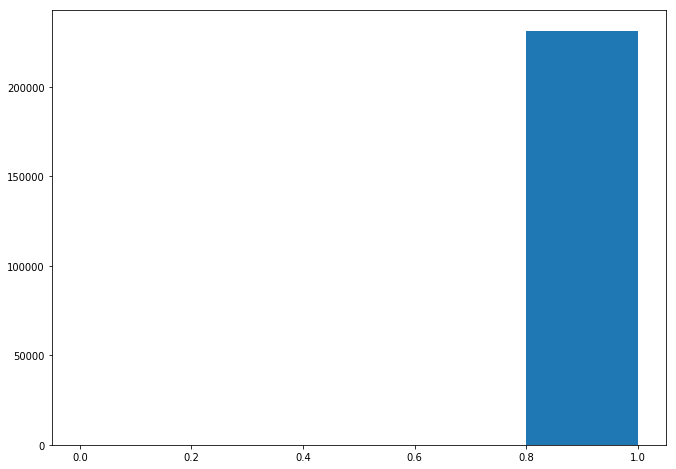

In [152]:
# index_values=range(0,len(y_test))
plt.figure(figsize = (11,8))
plt.hist(pred, bins = 5)
# plt.scatter(pd.Series(index_values),pred,color = 'blue')


In [155]:
type(pred_lr)

numpy.ndarray

In [154]:
type(y_test.values)

numpy.ndarray

In [ ]:
importance= []
importance = rf.feature_importances_.round(2)
print(importance)
np.sort(importance)

In [ ]:
X.columns

In [ ]:
lr.score(X_test,y_test)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg.score(X_train,y_train)

In [ ]:
pred = lg.predict(X_test)


In [ ]:
#

In [ ]:
cross_val_score(LogisticRegression(),X_train,y_train, cv = 5, scoring = "accuracy").mean()

In [ ]:
confusion_matrix(pred,y_test)

In [ ]:
y.count()

In [ ]:
print(len(y_test))
print(len(y_train))

In [ ]:
X.columns

In [ ]:
# sns.swarmplot(pred,y_test)

In [ ]:
# log(demog.age,10)

In [ ]:
# sns.boxplot(demog.age_lognorm)

In [ ]:
#plt.plot(demog[(demog.HF_YN == 'Y') & (demog.CRT_YN == 'Y') & (demog.MEDTRNC_CRT_YN == 'Y')]['FIRST_CNTCT_DT_DYS']);

In [ ]:
#demog.ETHNCTY.unique()

In [ ]:
#demog.RACE.unique()

In [ ]:
#sns.swarmplot(demog.FIRST_CNTCT_DT_DYS)

In [ ]:
# !pip install mpl_toolkits.basemap